In [1]:
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup

from IPython.display import Markdown, display

from rdkit import Chem

In [2]:

url='https://www.janestreet.com/puzzles/good-chemistry-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[7]+"\n"+"\t\n".join(y[10:19])))

### Good Chemistry
V-E+F=2	
f(ethanol) = 6	
f(paracetamol) = 242	
f(caffeine) = 630	
f(acetone) = 12	
f(uracil) = 128	
f(naphthalene) = 330	
f(nitroglycerin) = 210	
f(adenosine triphosphate) = ?

molecule                     V*E*F         Ans
--------                 ------------      ---
ethanol                   3 *  2 *  1 	=    6



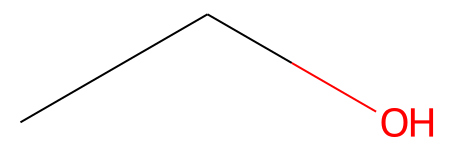

molecule                     V*E*F         Ans
--------                 ------------      ---
paracetamol              11 * 11 *  2 	=  242



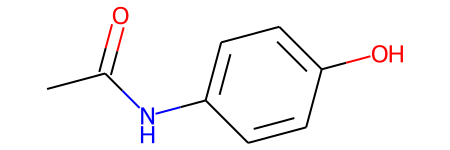

molecule                     V*E*F         Ans
--------                 ------------      ---
caffine                  14 * 15 *  3 	=  630



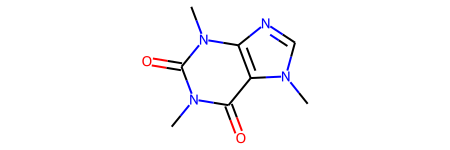

molecule                     V*E*F         Ans
--------                 ------------      ---
acetone                   4 *  3 *  1 	=   12



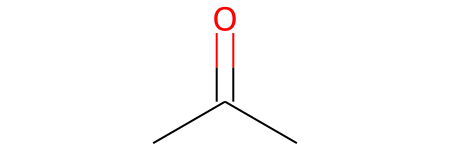

molecule                     V*E*F         Ans
--------                 ------------      ---
uracil                    8 *  8 *  2 	=  128



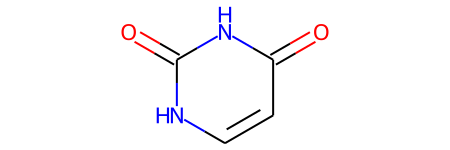

molecule                     V*E*F         Ans
--------                 ------------      ---
naphthalene              10 * 11 *  3 	=  330



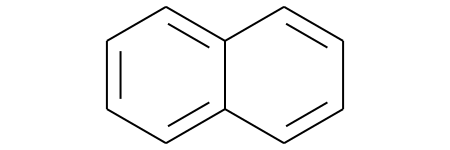

molecule                     V*E*F         Ans
--------                 ------------      ---
nitroglycerin            15 * 14 *  1 	=  210



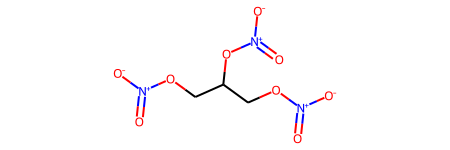

molecule                     V*E*F         Ans
--------                 ------------      ---
adenosine triphosphate   31 * 33 *  4 	= 4092



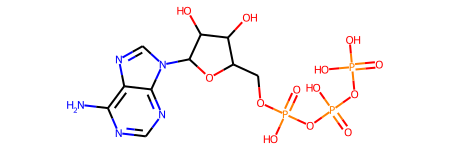

In [3]:
def ans(a,x):
    mol = Chem.MolFromSmiles(x)
    v = len([a.GetAtomicNum() for a in mol.GetAtoms()])
    e = len([b for b in mol.GetBonds()])
    f = mol.GetRingInfo().NumRings()+1
    print("molecule                     V*E*F         Ans")
    print("--------                 ------------      ---")
    print("{:25}{:2} * {:2} * {:2} \t= {:4}\n".format(a,v,e,f,v*e*f))
    display(mol)
    
molecules = {'ethanol':'CCO',
             'paracetamol':'CC(=O)NC1=CC=C(C=C1)O',
             'caffine':'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
             'acetone':'CC(=O)C' ,
             'uracil':'C1=CNC(=O)NC1=O' ,
             'naphthalene':'C1=CC=C2C=CC=CC2=C1' ,
             'nitroglycerin':'C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]' ,
             'adenosine triphosphate':'C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N'}


for a,b in molecules.items():
    ans(a,b)


In [4]:
url='https://www.janestreet.com/puzzles/good-chemistry-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n"+"\n".join(y[10:18])))

### June 2015 : Solution
Euler’s formula (V-E+F=2) applies to planar graphs as well as polyhedra. The
molecular structure of each molecule corresponds to a planar graph, where
Vertices are atoms (excluding hydrogens, per the typical convention for
molecular diagrams), bonds are Edges, and “Faces” are the number of distinct
regions into which the graph splits the plane. So for example, for paracetamol,
V=11, E=11, and F=2.
If you knew that, then you could probably figure out that we had set f(molecule)
equal to V
E
F! So, f(adenosine triphosphate) = 31
33
4 =
4092
.